# Introduction to Scikit-Learn (sklearn)
This notebook demostrates some of the most useful functions of the Scikit-Learn library.


0. An end-to-end Scikit-Learno Workflow
1. Gettin the data ready
2. Choose the rigth estimator/algotithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluatin a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end Scikit-Learn workflow

In [17]:
# Standar imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("Data/heart-disease.csv") 
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [19]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1) #axis=1 columnas

# Create y (labels)
y = heart_disease["target"]

In [20]:
# 2. Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [21]:
# 3. Fit the model to the training data
# Split the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2) #80% entretamiento y 20% para test

In [22]:
# .fit el modelo está entrenando
clf.fit(X_train, y_train);

In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2


In [24]:
# make a prediction
y_label = clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [25]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0


In [26]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [27]:
y_test

167    0
237    0
26     1
108    1
251    0
      ..
134    1
258    0
82     1
48     1
225    0
Name: target, Length: 61, dtype: int64

In [28]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [29]:
clf.score(X_test, y_test)

0.8688524590163934

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85        29
           1       0.82      0.97      0.89        32

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.87        61
weighted avg       0.88      0.87      0.87        61



In [31]:
confusion_matrix(y_test, y_preds)

array([[22,  7],
       [ 1, 31]])

In [32]:
accuracy_score(y_test, y_preds) #Accuracy= precisión, exactitud

0.8688524590163934

In [33]:
# 5. Improve a model
# Try different amonut of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...") # Se pone f para concatenar string con variable, en este {i}
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on teste set_{clf.score(X_test, y_test)*100:.2f}%") # :.2 es para dejar en 2 decimales
    print("")

Trying model with 10 estimators...
Model accuracy on teste set_81.97%

Trying model with 20 estimators...
Model accuracy on teste set_81.97%

Trying model with 30 estimators...
Model accuracy on teste set_78.69%

Trying model with 40 estimators...
Model accuracy on teste set_86.89%

Trying model with 50 estimators...
Model accuracy on teste set_85.25%

Trying model with 60 estimators...
Model accuracy on teste set_85.25%

Trying model with 70 estimators...
Model accuracy on teste set_86.89%

Trying model with 80 estimators...
Model accuracy on teste set_83.61%

Trying model with 90 estimators...
Model accuracy on teste set_83.61%



In [34]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [35]:
loaden_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaden_model.score(X_test, y_test)

0.8360655737704918

In [36]:
loaden_model.predict([[ 40.,   1.,   0., 110., 167.,   0.,   0., 114.,   1.,   2.,   1.,
         0.,   3.]])

array([0])

In [37]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0


In [38]:
# Para probar el modelo se toma como referencia los datos de la posición [0] con .iloc.
X_test.iloc[0].values

array([ 62. ,   0. ,   0. , 140. , 268. ,   0. ,   0. , 160. ,   0. ,
         3.6,   0. ,   2. ,   2. ])

In [39]:
# Se modifican datos y se ve el resultado que arroja el modelo, siendo 1 que tiene probabilidad de tener un problema cardiaco y 0 que no.
loaden_model.predict([[ 45.,   1.,   3., 140., 187.,   0.,   1., 154.,   1.,   1.,   2.,
         4.,   2.]])

array([1])

## 1. Getting our data ready to be used with Machine Learning
Thre main thing we have to do:

    1. Split the data into features and labels (usually 'X' & 'y')
    2. Filling(also callen imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values(also called feature encoding)

### 1.1 Make sure it's all numerical

In [40]:
# pd.read_csv("") = cargar csv
car_sales = pd.read_csv("Data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [41]:
# len=largo
len(car_sales) 

1000

In [42]:
# dtype = tipo de dato
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [43]:
# Split into X/y
X = car_sales.drop("Price", axis=1) # Todas las columnas menos la columna precio
y = car_sales["Price"] # nuestra variable y será el precio, lo que queremos estimar

#Split into training and test

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2) # 80 % entramiento, 20% test

In [44]:
# Buil ML model

from sklearn.ensemble import RandomForestRegressor # RandomrForestRegressor predice números

model = RandomForestRegressor()
model.fit(X_train, y_train) # se entrena el modelo con esas variables
model.score(X_test, y_test) # se obtiene precisión del modelo


ValueError: could not convert string to float: 'Honda'

In [45]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # se toman las 2 col categóricas, más las puertas, debido a que no se modifican
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                   remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [46]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [47]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [48]:
dummies = pd.get_dummies(car_sales[["Make","Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [49]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
model.score(X_test, y_test)

0.3235867221569877

In [51]:
# probando con dummies
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(dummies,
                                                   y,
                                                   test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [52]:
model.score(X_test, y_test)

0.2920788538619685

### 1.2 What if there wre missing values?
1. Fill them with some value(also known as imputation).
2. Remove the samples with missing data altogether

In [53]:
# Import car sales missing data extended
car_sales_missing = pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [54]:
# ver si hay datos nulos en el csv
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [55]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]

In [56]:
# Let's try and convert our data in numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # se toman las 2 col categóricas, más las puertas, debido a que no se modifican
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                   remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [57]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


## Option 1: Fill missing data with Pandas

In [58]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the " Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer(KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)


In [59]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [60]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [61]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [62]:
len(car_sales_missing)

950

In [63]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # se toman las 2 col categóricas, más las puertas, debido a que no se modifican
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                   remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-learn

In [65]:
# Utilizamos un archivo que tenga celdas en blanco y lo abrimos.
car_sales_missing_values = pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing_values.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [66]:
# Se verifica si el archivo tiene valores en blanco.
car_sales_missing_values.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [67]:
# Se utiliza .dropna para eliminar los celdas(filas) en la columna "Price" y se vuelve a chequear la cantidad de valores en blanco.
car_sales_missing_values.dropna(subset=["Price"], inplace=True)
car_sales_missing_values.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [68]:
# Se utiliza Split para eje X & y, en eje X se elimina columna "Precios" y se conservan las demás, en el eje y se guarda sólo "Precios"
X = car_sales_missing_values.drop("Price", axis=1)
y = car_sales_missing_values["Price"]

In [69]:
# Se importa la siguiente función para rellenar valores vacios con sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
categorical_imputer = SimpleImputer(strategy = "constant", fill_value="missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value=4)
numerical_imputer = SimpleImputer(strategy = "mean")

#Define columns
categorical_features = ["Make", "Colour"]
door_features = ["Doors"]
numerical_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("categorical_imputer", categorical_imputer, categorical_features),
    ("door_imputer", door_imputer, door_features),
    ("numerical_imputer", numerical_imputer, numerical_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [70]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns = ["Make", "Colour", "Doors"," Odometer(KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer(KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [71]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
 Odometer(KM)    0
dtype: int64

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # se toman las 2 col categóricas, más las puertas, debido a que no se modifican
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                   remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [73]:
# Now we've got our data as numbers and filled(no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test,y_test)


0.21990196728583944

In [74]:
len(car_sales_filled)

950

## 2. Choosing the right estimator/algorithm for our problem
Scikit-Learn uses estimator as another term for machine learning model or algorithm

* Classification - predicting whether a sample is one thing or another
* Regression- predicting a number

Step 1 - Check the Scikit- Learn machine learning map
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


### 2.1 Picking a ML model for a regression problem

In [75]:
# Import Boston housing dataset (es un diccionario)
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [76]:
boston_df = pd.DataFrame(boston["data"], columns = boston ["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [77]:
# How many samples have Boston diccionary?
len(boston_df)

506

In [78]:
# Let's try the Ridge Regression model

from sklearn.linear_model import Ridge

# Setup random seed

np.random.seed(42)

# Create the data

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

# Instantiate Ridge model 

model = Ridge()
model.fit(X_train, y_train)

#Check the score of the Ridge model on test data

model.score(X_test, y_test) #score=r^2


0.6662221670168521

### How do we improve this score?
### what if the Ridge wasn't working?



In [79]:
# Let's try Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

#Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]


#split de data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instatiate Random Forest Regressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

#Evaluate the Random Forest Regresor
rf.score(X_test, y_test)

0.8654448653350507

In [80]:
# Check the Ridge model again

model.score(X_test, y_test)

0.6662221670168521

### 2.2 Choosing and estimator for a clasification problem

Let's go to the map

In [81]:
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
len(heart_disease)

303

Consulting the map and it says to try LinearSVC

In [83]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

#Make the data

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC

clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

#Evaluate the LinearSVC
clf.score(X_test, y_test)

/Users/vivianameneses/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [84]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [85]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:
1. If you have structured data, used ensemble method
2.  If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data use it to make prediction

### 3.1 Fitting the model to the data

Different namer for:
* X= features, features variables, data
* y = labels, targets, targe variables

In [86]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data(training the machine learning model)
clf.fit(X_train, y_train)

#Evaluate the Random Forest Classifier( use the patterns the model has)
clf.score(X_test, y_test)

0.8524590163934426

In [87]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [88]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model
2 ways to make predictions:
1. predict( )
2. predict_proba ( )

In [89]:
# Use a trained model to make predictions
clf.predict(np.array[1,7,8,3,4]) #this doesn't work...

TypeError: 'builtin_function_or_method' object is not subscriptable

In [90]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [91]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [92]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [93]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [94]:
clf.score(X_test, y_test)

0.8524590163934426

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

 Make predictions with ' predict_proba() '

In [96]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [97]:
#Podemos ver que el valor de la derecha es mayor, si comparamos con predict(), podemos ver que en la primera fila, seria 0, segunda fila 1,1,0,1...

In [98]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [99]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

'predict()' can also used for refression models-

In [100]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [101]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit model

model= RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)


In [102]:
y_preds

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [103]:
y_test[:10]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
76     20.0
316    17.8
140    14.0
471    19.6
500    16.8
Name: target, dtype: float64

In [104]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [105]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [106]:
# Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## 4. Evaluating a machile learning model

3 ways to evaluate Scikit-Learn models/estimators
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions.

### 4.1 Evaluating a model with the `score` method

In [107]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)



RandomForestClassifier()

In [109]:
clf.score(X_train, y_train)

1.0

In [110]:
clf.score(X_test, y_test)

0.8524590163934426

In [111]:
# Score en Random Forest Clasification is accuracy

Let's do the same but for regression...

In [112]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit model

model= RandomForestRegressor(n_estimators=100).fit(X_train, y_train)


In [113]:
model.score(X_test, y_test)

0.8654448653350507

In [114]:
# Score en Random Forest Regression is R^2

### 4.2 Evaluating a model using the `scoring`parameter

In [115]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);

In [116]:
clf.score(X_test, y_test)

0.8524590163934426

In [117]:
cross_val_score(clf, X, y, cv=5) #cv=cross-validation

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [118]:
np.random.seed(42)

# Single training test split score
clf_single_score = clf.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X,y, cv=5))

# Compate the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [119]:
# Default scoring parameter of classifier = mean accuracy
clf.score(X_test, y_test)

0.8524590163934426

In [120]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report


### Accuracy

In [121]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [123]:
np.mean(cross_val_score)

0.8248087431693989

In [124]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


### Area under the receiver operating characteristic curve (AUC/EOC)
* Area under curve (AUC)
* ROC curve

ROC curves area a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)

* True positive = model predcits 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [125]:
# Create X_test...etc
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [126]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [127]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [128]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

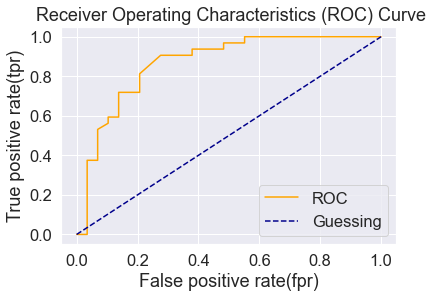

In [129]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    
    # Plot ROC curve
    
    plt.plot(fpr,tpr, color = "orange", label ="ROC")
    
    # PLot line with no predictive power(baseline)
    plt.plot([0,1], [0,1], color = "darkblue", linestyle="--", label ="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title(" Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)
    

In [130]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

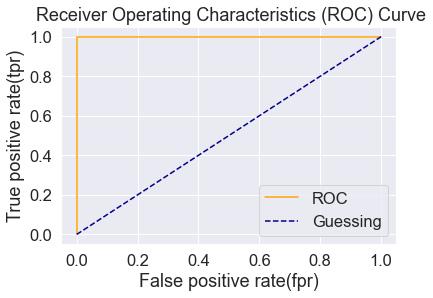

In [131]:
# PLot perfect ROC curve and AUC score

fpr,tpr,thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [132]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predcit.

In essence, giving you an idea of where the model is getting confused.


In [133]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)


array([[23,  6],
       [ 6, 26]])

In [134]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames = [" Actual Label"],
           colnames = [" Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [135]:
22+7+8+24


61

In [136]:
len(y_preds)

61

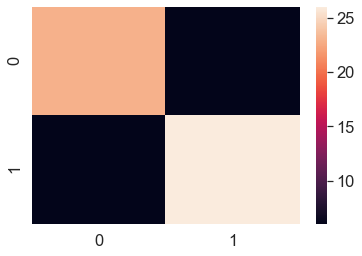

In [137]:
# Make our confusion matrix more visual with Seabor's heatmap()

import seaborn as sns

#Set the font scale
sns.set(font_scale=1.5)

#Crate a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);


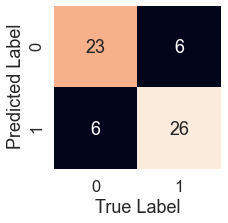

In [139]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize= (3,3))
    ax = sns.heatmap(conf_mat,
                    annot = True, # Annotate the boxes with conf_mat info
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel(" Predicted Label")
    
    # Fix the broken annotation(this happened in Matplolib 3.1.1)
    #bottom, top = ax.get_ylim()
    #ax.set_ylimb(bottom + 0.5, to- 0.3);
    
plot_conf_mat(conf_mat)

## Classification Report

In [140]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [141]:
# Where precision and reacall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model precits every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))


/Users/vivianameneses/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vivianameneses/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vivianameneses/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To Summarize classification metrics:

* ***Accuracy*** is a good measure to start with if all classes are balanced (e.g. same amount of samples wich are labelled with  0 or 1).
* ***Precision*** and ***Recall*** become more import when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predcitions are worse tha false positives, aim for higher recall.
* ***F1-Score*** es a combination of precision and recall.

## 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentations

1. R^2 or coefficient of determination
2. Mean absolute error(MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predcits a range of numbers it's R^2 value would be 1.

In [144]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train);

In [145]:
model.score(X_test, y_test)

0.8654448653350507

In [146]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [148]:
y_test.mean()

21.488235294117654

In [149]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [150]:
r2_score(y_test, y_test)

1.0

## Mean absolute error (MAE)
MAE is the average of the absolute differences between predictions and actual values. It give you an idea of how wrong your models predctions are.

In [157]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [161]:
df = pd.DataFrame( data = {"actual values" : y_test,
                          "predicted values": y_preds} )
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


## Mean squared error (MSE)

In [167]:
# Mean squared error 
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [173]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

9.867437068627439